In [137]:
import numpy as np
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
def fetch_mnist():
    # Download MNIST dataset
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
    X = X.to_numpy()
    y = y.to_numpy()

    # Randomly sample 7000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 7000, replace=False)
    X, y = X[indices], y[indices]
    return X, y


X, y = fetch_mnist()
print(X.shape, y.shape)

(7000, 784) (7000,)


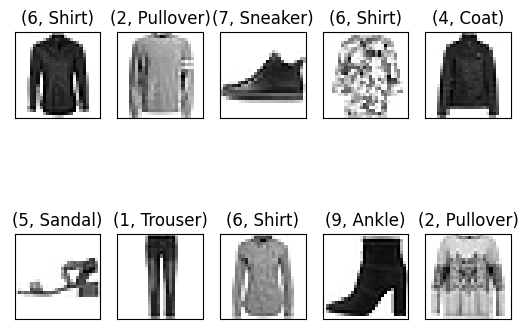

In [189]:
idx2class = {'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat',
             '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle'}
images = [image.reshape(28, 28) for image in X[:10]]
fig, axs = plt.subplots(2,5)
for i,(image,lable) in enumerate(zip(images,y[:10])):
    ax = axs[i//5,i%5]
    ax.imshow(image,cmap='binary')
    ax.set_title(f'({lable}, {idx2class[lable]})')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    

In [140]:
def cross_validation_error(X, y, model, folds=4):
    X_folds = np.array_split(X, folds)
    y_folds = np.array_split(y, folds)
    train_error = []
    val_error = []
    for j in range(folds):
        x_test = X_folds[j]
        y_test = y_folds[j]
        x_train = np.vstack([X_folds[i] for i in range(folds) if i != j])
        y_train = np.concatenate([y_folds[i] for i in range(folds) if i != j])
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
        y_train_pred = model.predict(x_train)
        train_error.append(np.average(y_train_pred != y_train))
        val_error.append(np.average(y_test_pred != y_test))
    return np.round(np.average(train_error), 3), np.round(np.average(val_error), 3)

In [155]:
from sklearn.svm import SVC


def SVM_results(X_train, y_train, X_test, y_test):
    errors = {}
    parameters = {'linear': [1], 'poly': [2, 4, 6, 8], 'rbf': [1e-3, 1e-2, 1e-1, 1e-0, 10]}
    
    for type, params in parameters.items():
        for param in params:
            model = None
            if type == 'linear':
                model = SVC(kernel='linear')
            elif type == 'poly':
                model = SVC(kernel='poly', degree=param)
            else:
                model = SVC(kernel='rbf',gamma=param)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            CV = cross_validation_error(X_train, y_train, model)
            test_error = np.round(np.average(y_pred != y_test), 3)
            errors[f'SVM_{type}_{param}'] = tuple(CV) + tuple([test_error])
    return errors

In [156]:
import matplotlib.pyplot as plt


def plot_SVM_CV_results(avg_train_error, avg_val_error, test_error, lamda):
    bar_width = 0.2
    bar = np.arange(len(lamda))

    plt.bar(bar - 0.2, avg_train_error, width=bar_width, label='Avg train error',
            edgecolor='black', align='center')
    plt.bar(bar, avg_val_error, width=bar_width, label='Avg validation error',
            edgecolor='black', align='center')
    plt.bar(bar + 0.2, test_error, width=bar_width, label='test error',
            edgecolor='black', align='center')
    plt.xlabel('\u03BB')
    plt.ylabel('Error Rate')
    plt.xticks(bar, lamda, rotation=45)
    plt.title("Average Train and validation error and Test Error rate per lambda value")
    plt.legend()
    plt.show()

SVM_linear_1 DONE
SVM_poly_2 DONE
SVM_poly_4 DONE
SVM_poly_6 DONE
SVM_poly_8 DONE
SVM_rbf_0.001 DONE
SVM_rbf_0.01 DONE
SVM_rbf_0.1 DONE
SVM_rbf_1.0 DONE
SVM_rbf_10 DONE


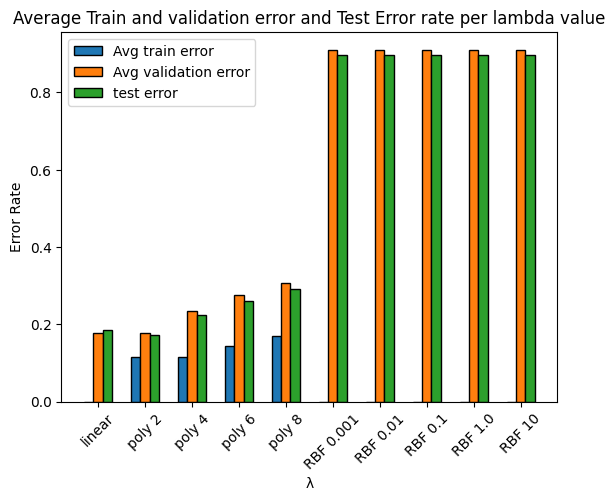

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
results = SVM_results(X_train, y_train, X_test, y_test)

avg_train_error = []
avg_val_error = []
test_error = []
for k in results:
    avg_train_error.append(results[k][0])
    avg_val_error.append(results[k][1])
    test_error.append(results[k][2])
lam = ["linear", 'poly 2', 'poly 4', 'poly 6', 'poly 8', 'RBF 0.001', 'RBF 0.01', 'RBF 0.1', 'RBF 1.0', 'RBF 10']
plot_SVM_CV_results(avg_train_error, avg_val_error, test_error, lam)

As we can see, the Polynomial(Degree=2) SVM model performs better than any other model,the lowest validation error rate,
 in the Cross-Validation method and on the test set.
We know from class that the results from the CV implies that the better model will behave similarly on the test set.1